In [9]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [10]:
def find_closest_centroids(X, centroids):
    """
    Computes the centroid memberships for every example
    
    Args:
        X (ndarray): (m, n) Input values      
        centroids (ndarray): (K, n) centroids
    
    Returns:
        idx (array_like): (m,) closest centroids
    
    """

    # Set K
    K = centroids.shape[0]


    idx = np.zeros(X.shape[0], dtype=int)

    for i in range(X.shape[0]):
        # Array to hold distance between X[i] and each centroids[j]
        distance = [] 
        for j in range(centroids.shape[0]):
            norm_ij = np.linalg.norm(X[i] - centroids[j])# calculate the norm between (X[i] - centroids[j])
            distance.append(norm_ij)

        idx[i] =np.argmin(distance)
        

    
    return idx

def compute_centroids(X, idx, K):
    """
    Returns the new centroids by computing the means of the 
    data points assigned to each centroid.
    
    Args:
        X (ndarray):   (m, n) Data points
        idx (ndarray): (m,) Array containing index of closest centroid for each 
                       example in X. Concretely, idx[i] contains the index of 
                       the centroid closest to example i
        K (int):       number of centroids
    
    Returns:
        centroids (ndarray): (K, n) New centroids computed
    """

    m, n = X.shape

    centroids = np.zeros((K, n))
    

    for k in range(K):   
          points = X[idx == k]  
          centroids[k] =np.mean(points, axis = 0)
        

    
    return centroids

def run_kMeans(X, initial_centroids, max_iters=10, plot_progress=False):
    """
    Runs the K-Means algorithm on data matrix X, where each row of X
    is a single example
    """
    
    # Initialize values
    m, n = X.shape
    K = initial_centroids.shape[0]
    centroids = initial_centroids
    previous_centroids = centroids    
    idx = np.zeros(m)
    plt.figure(figsize=(8, 6))
    past_centroids = 0

    # Run K-Means
    for i in range(max_iters):
        
        #Output progress
        print("K-Means iteration %d/%d" % (i, max_iters-1))
        
        # For each example in X, assign it to the closest centroid
        idx = find_closest_centroids(X, centroids)
        
        # Optionally plot progress
        if plot_progress:
            plot_progress_kMeans(X, centroids, previous_centroids, idx, K, i)
            previous_centroids = centroids
            
        # Given the memberships, compute new centroids
        centroids = compute_centroids(X, idx, K)
        # print(centroids)
        if np.array_equal(past_centroids, centroids):
            break
        past_centroids = centroids
        

    plt.show() 
    return centroids, idx

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from mpl_toolkits.mplot3d import Axes3D

def draw_line(p1, p2, style="-k", linewidth=1):
    plt.plot([p1[0], p2[0]], [p1[1], p2[1]], style, linewidth=linewidth)

def plot_data_points(X, idx):
    # Define colormap to match Figure 1 in the notebook
    cmap = ListedColormap(["red", "green", "blue"])
    c = cmap(idx)
    
    # plots data points in X, coloring them so that those with the same
    # index assignments in idx have the same color
    plt.scatter(X[:, 0], X[:, 1], facecolors='none', edgecolors=c, linewidth=0.1, alpha=0.7)

def plot_progress_kMeans(X, centroids, previous_centroids, idx, K, i):
    # Plot the examples
    plot_data_points(X, idx)
    
    # Plot the centroids as black 'x's
    plt.scatter(centroids[:, 0], centroids[:, 1], marker='x', c='k', linewidths=3)
    
    # Plot history of the centroids with lines
    for j in range(centroids.shape[0]):
        draw_line(centroids[j, :], previous_centroids[j, :])
    
    plt.title("Iteration number %d" %i)


def plot_kMeans_RGB(X, centroids, idx, K):
    # Plot the colors and centroids in a 3D space
    fig = plt.figure(figsize=(16, 16))
    ax = fig.add_subplot(221, projection='3d')
    ax.scatter(*X.T*255, zdir='z', depthshade=False, s=.3, c=X)
    ax.scatter(*centroids.T*255, zdir='z', depthshade=False, s=500, c='red', marker='x', lw=3)
    ax.set_xlabel('R value - Redness')
    ax.set_ylabel('G value - Greenness')
    ax.set_zlabel('B value - Blueness')
    ax.w_yaxis.set_pane_color((0., 0., 0., .2))
    ax.set_title("Original colors and their color clusters' centroids")
    plt.show()


def show_centroid_colors(centroids):
    palette = np.expand_dims(centroids, axis=0)
    num = np.arange(0,len(centroids))
    plt.figure(figsize=(16, 16))
    plt.xticks(num)
    plt.yticks([])
    plt.imshow(palette)


In [12]:
def kMeans_init_centroids(X, K):
    """
    This function initializes K centroids that are to be 
    used in K-Means on the dataset X
    
    Args:
        X (ndarray): Data points 
        K (int):     number of centroids/clusters
    
    Returns:
        centroids (ndarray): Initialized centroids
    """
    
    # Randomly reorder the indices of examples
    randidx = np.random.permutation(X.shape[0])
    
    # Take the first K examples as centroids
    centroids = X[randidx[:K]]
    
    return centroids

import numpy as np

def kMeans_init_centroids_nonrand(X, K):
    """
    Initialize centroids using K-Means++
    
    Args:
        X (ndarray): Data points 
        K (int):     Number of centroids/clusters
    
    Returns:
        centroids (ndarray): Initialized centroids
    """
    num_samples, num_features = X.shape
    
    # Initialize centroids array
    centroids = np.empty((K, num_features))
    
    # Randomly choose the first centroid
    rand_index = np.random.randint(0, num_samples)
    centroids[0] = X[rand_index]
    
    # Calculate distances to the first centroid
    distances = np.linalg.norm(X - centroids[0], axis=1)
    
    for k in range(1, K):
        # Choose the next centroid based on maximum distance probability
        prob = distances ** 2 / np.sum(distances ** 2)
        cum_prob = np.cumsum(prob)
        
        # Select a random value and find the next centroid
        rand_val = np.random.rand()
        for idx, c_prob in enumerate(cum_prob):
            if rand_val < c_prob:
                centroids[k] = X[idx]
                break
        
        # Update distances using the new centroid
        new_distances = np.linalg.norm(X - centroids[k], axis=1)
        distances = np.minimum(distances, new_distances)
    
    return centroids


In [13]:
# # Load an example dataset
# X = data
# K = 3
# # Set initial centroids
# initial_centroids = kMeans_init_centroids(X, K)
# print(initial_centroids)

# # Number of iterations
# max_iters = 10
# # Run K-Means
# centroids, idx = run_kMeans(X, initial_centroids, max_iters, plot_progress=True)

**image processing**

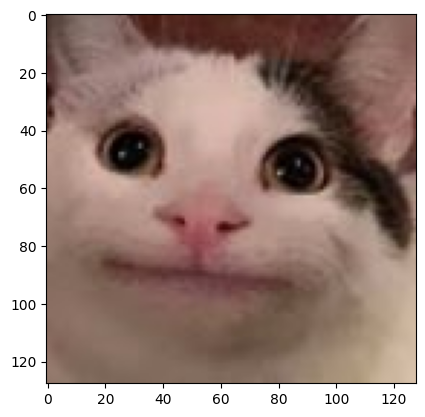

In [14]:
#original_img = plt.imread('bird_small.png')
original_img = plt.imread('Beluga_128.png')
plt.imshow(original_img)

In [15]:
print("Shape of original_img is:", original_img.shape)
original_img = original_img[:, :, :3]
print("Shape of new* original_img is:", original_img.shape)
# Divide by 255 so that all values are in the range 0 - 1 (not needed for PNG files)
# original_img = original_img / 255

# Reshape the image into an m x 3 matrix where m = number of pixels
# (in this case m = 128 x 128 = 16384)
# Each row will contain the Red, Green and Blue pixel values
# This gives us our dataset matrix X_img that we will use K-Means on.

X_img = np.reshape(original_img, (original_img.shape[0] * original_img.shape[1], 3))

Shape of original_img is: (128, 128, 4)
Shape of new* original_img is: (128, 128, 3)




K = 2

K-Means iteration 0/999
K-Means iteration 1/999
K-Means iteration 2/999
K-Means iteration 3/999
K-Means iteration 4/999
K-Means iteration 5/999
K-Means iteration 6/999
K-Means iteration 7/999
K-Means iteration 8/999
K-Means iteration 9/999
K-Means iteration 10/999
K-Means iteration 11/999
K-Means iteration 12/999
K-Means iteration 13/999


<Figure size 800x600 with 0 Axes>

MSE  (Random) : 0.010780504827607652
K-Means iteration 0/999
K-Means iteration 1/999
K-Means iteration 2/999
K-Means iteration 3/999
K-Means iteration 4/999
K-Means iteration 5/999
K-Means iteration 6/999
K-Means iteration 7/999
K-Means iteration 8/999
K-Means iteration 9/999
K-Means iteration 10/999
K-Means iteration 11/999
K-Means iteration 12/999
K-Means iteration 13/999


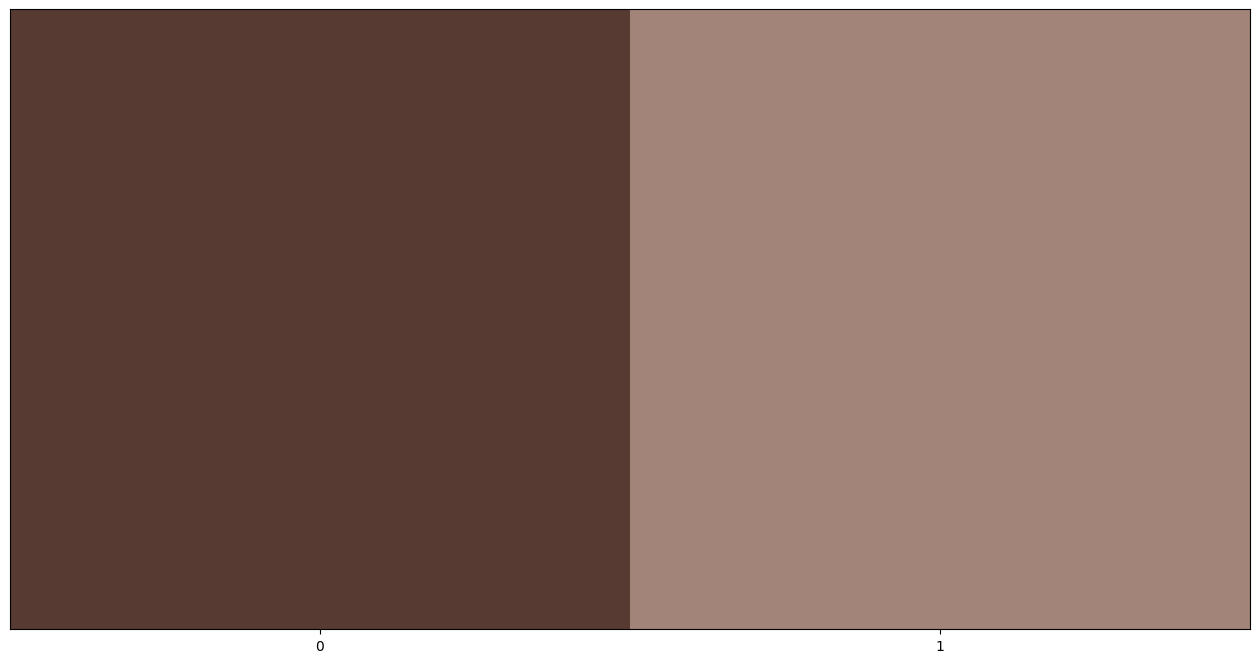

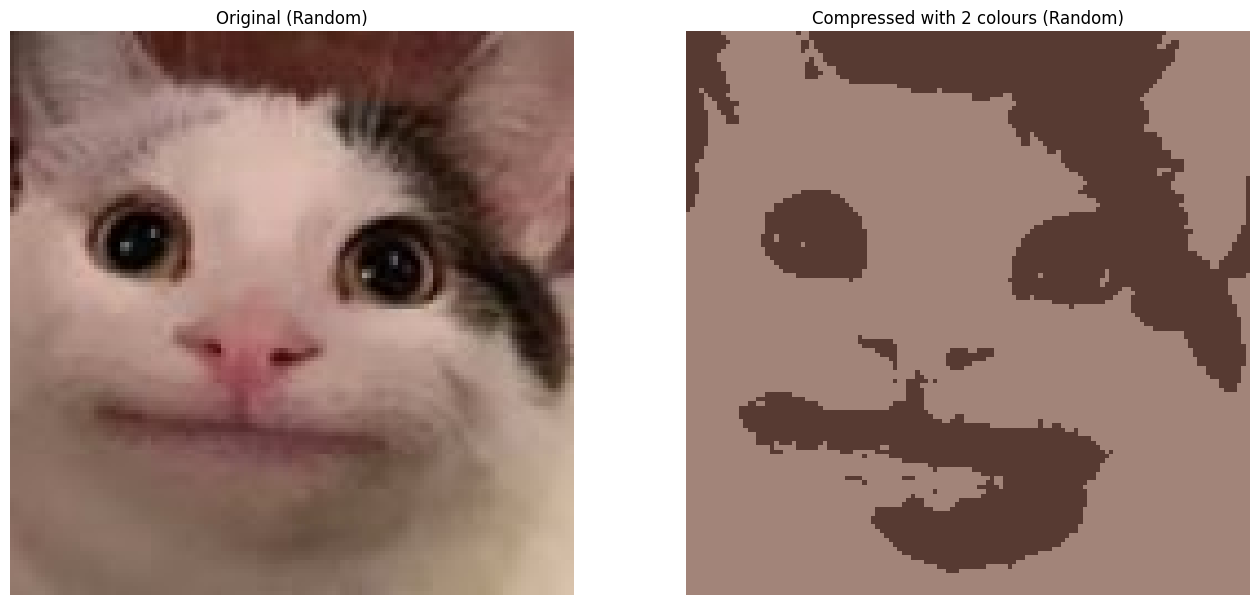

<Figure size 800x600 with 0 Axes>

MSE  (Non-Random): 0.010780504827607652


K = 3

K-Means iteration 0/999
K-Means iteration 1/999
K-Means iteration 2/999
K-Means iteration 3/999
K-Means iteration 4/999
K-Means iteration 5/999
K-Means iteration 6/999
K-Means iteration 7/999
K-Means iteration 8/999
K-Means iteration 9/999


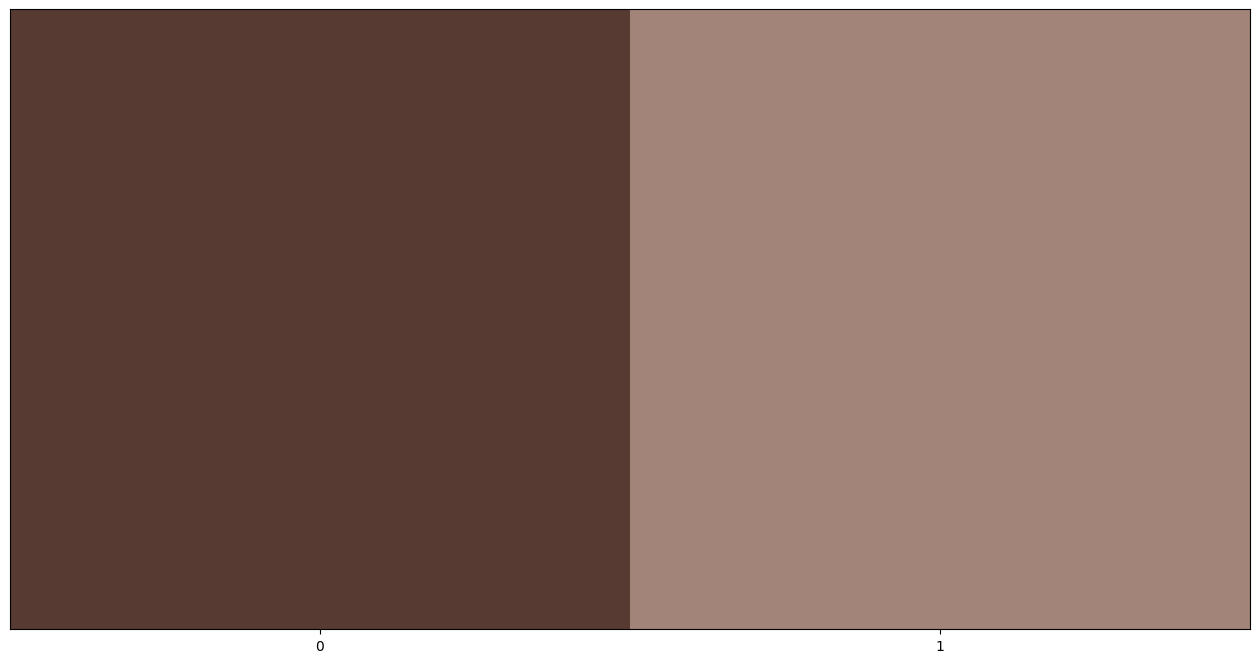

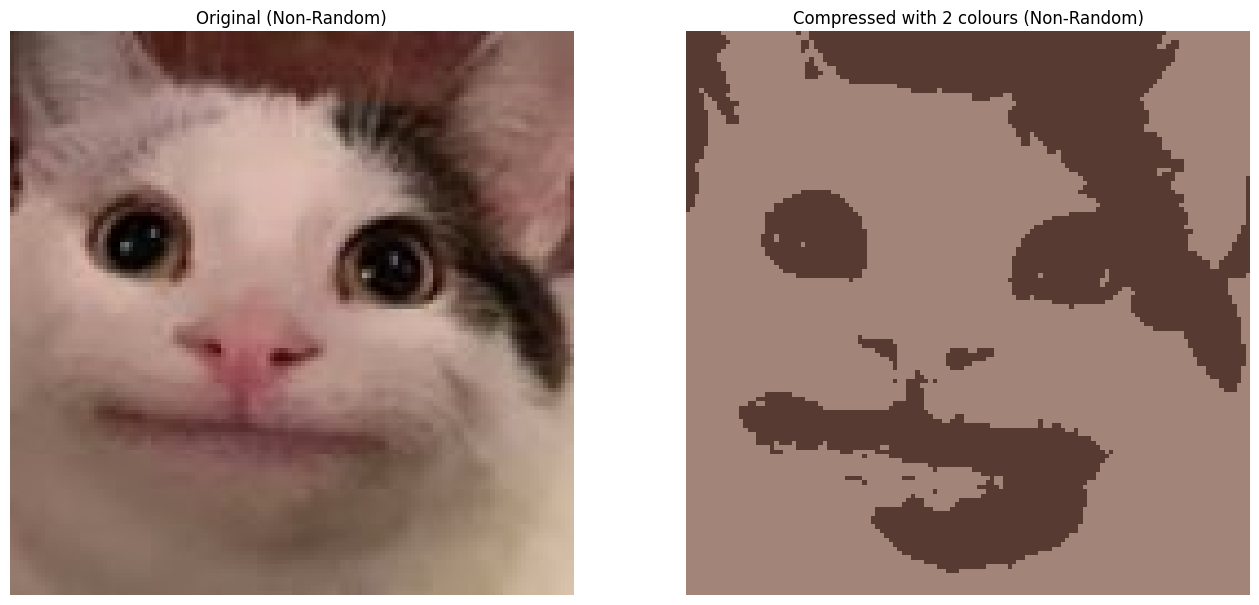

<Figure size 800x600 with 0 Axes>

MSE  (Random) : 0.004091595689442336
K-Means iteration 0/999
K-Means iteration 1/999
K-Means iteration 2/999
K-Means iteration 3/999
K-Means iteration 4/999
K-Means iteration 5/999
K-Means iteration 6/999
K-Means iteration 7/999
K-Means iteration 8/999
K-Means iteration 9/999
K-Means iteration 10/999


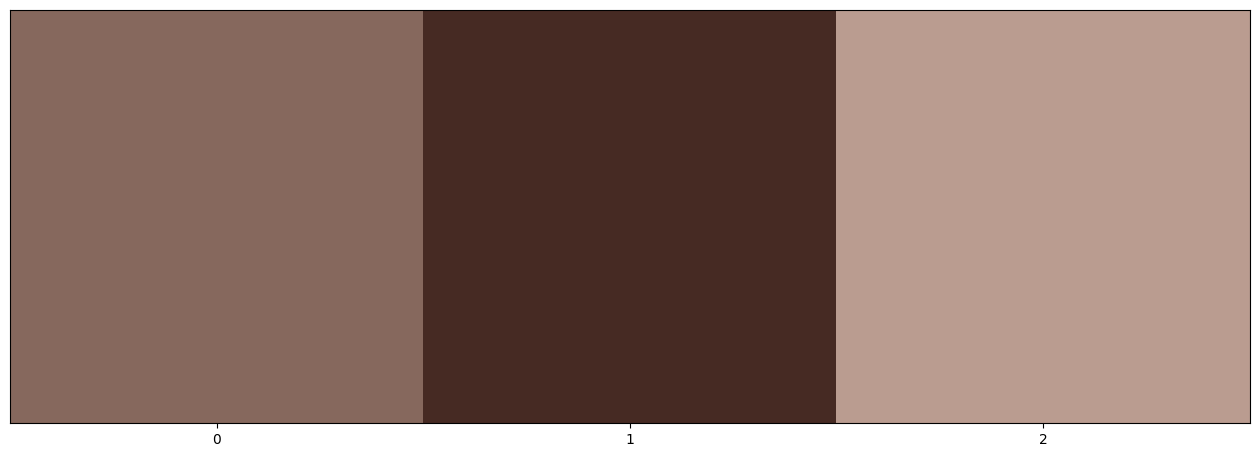

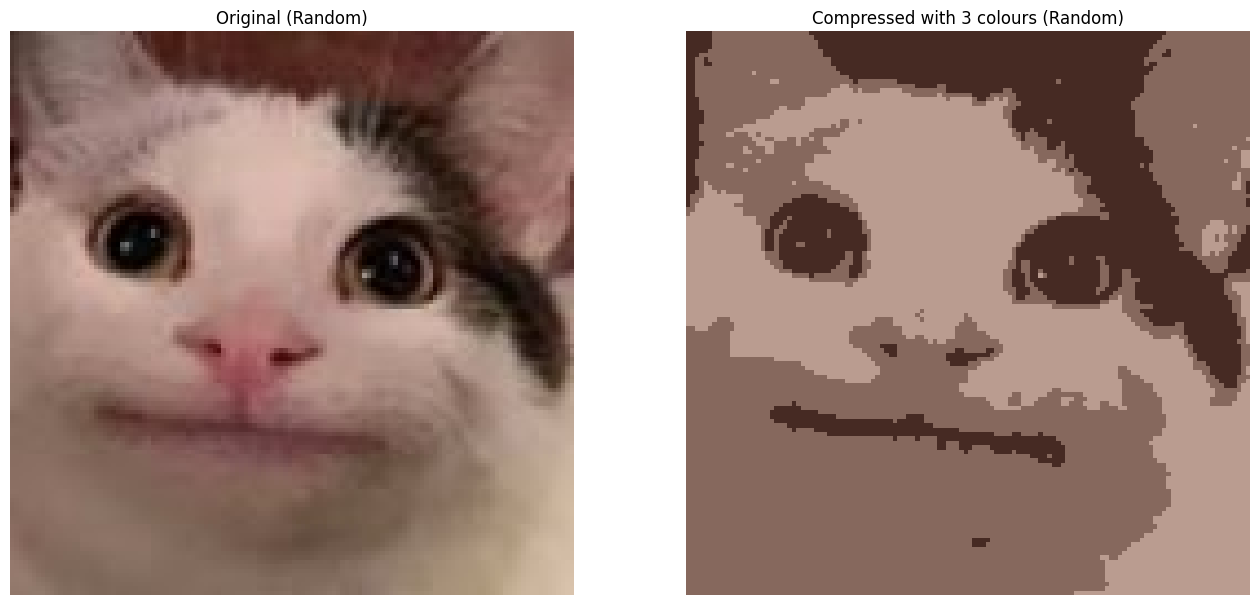

<Figure size 800x600 with 0 Axes>

MSE  (Non-Random): 0.004091595689442336


K = 10

K-Means iteration 0/999
K-Means iteration 1/999
K-Means iteration 2/999
K-Means iteration 3/999
K-Means iteration 4/999
K-Means iteration 5/999
K-Means iteration 6/999
K-Means iteration 7/999
K-Means iteration 8/999
K-Means iteration 9/999
K-Means iteration 10/999
K-Means iteration 11/999
K-Means iteration 12/999
K-Means iteration 13/999
K-Means iteration 14/999
K-Means iteration 15/999
K-Means iteration 16/999
K-Means iteration 17/999
K-Means iteration 18/999
K-Means iteration 19/999
K-Means iteration 20/999
K-Means iteration 21/999
K-Means iteration 22/999
K-Means iteration 23/999
K-Means iteration 24/999
K-Means iteration 25/999
K-Means iteration 26/999
K-Means iteration 27/999
K-Means iteration 28/999
K-Means iteration 29/999
K-Means iteration 30/999
K-Means iteration 31/999
K-Means iteration 32/999
K-Means iteration 33/999
K-Means iteration 34/999
K-Means iteration 35/999
K-Means iteration 36/999
K-Means iteration 37/999
K-Means it

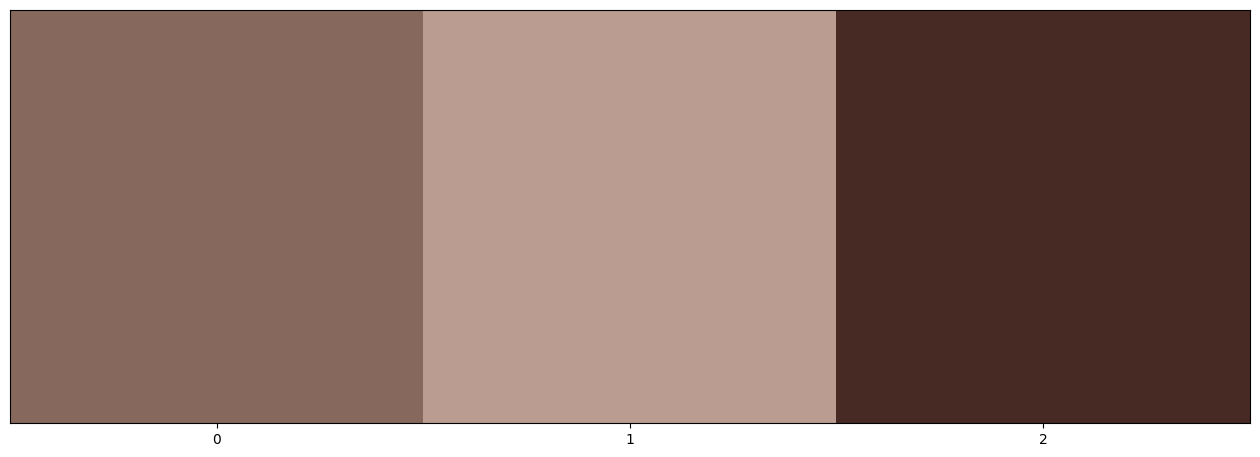

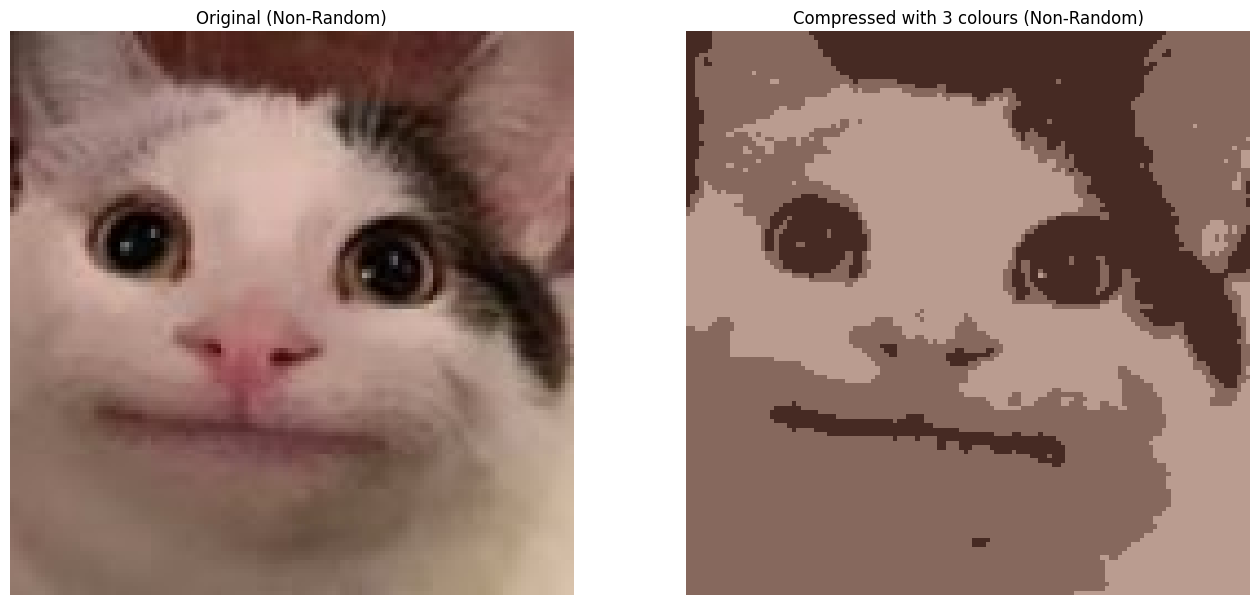

<Figure size 800x600 with 0 Axes>

MSE  (Random) : 0.0006755481046933206
K-Means iteration 0/999
K-Means iteration 1/999
K-Means iteration 2/999
K-Means iteration 3/999
K-Means iteration 4/999
K-Means iteration 5/999
K-Means iteration 6/999
K-Means iteration 7/999
K-Means iteration 8/999
K-Means iteration 9/999
K-Means iteration 10/999
K-Means iteration 11/999
K-Means iteration 12/999
K-Means iteration 13/999
K-Means iteration 14/999
K-Means iteration 15/999
K-Means iteration 16/999
K-Means iteration 17/999
K-Means iteration 18/999
K-Means iteration 19/999
K-Means iteration 20/999
K-Means iteration 21/999
K-Means iteration 22/999
K-Means iteration 23/999
K-Means iteration 24/999
K-Means iteration 25/999
K-Means iteration 26/999
K-Means iteration 27/999
K-Means iteration 28/999
K-Means iteration 29/999
K-Means iteration 30/999
K-Means iteration 31/999
K-Means iteration 32/999
K-Means iteration 33/999
K-Means iteration 34/999
K-Means iteration 35/999
K-Means iteration 36/999
K-Means iteration 37/999
K-Means iteration 38/9

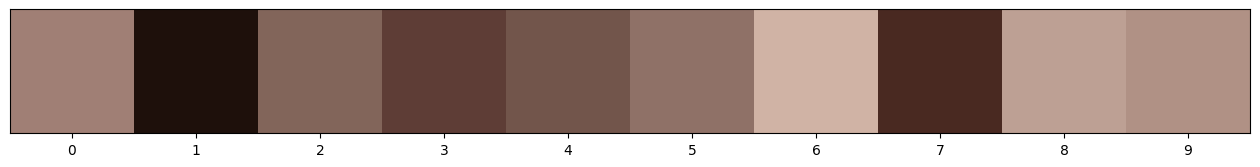

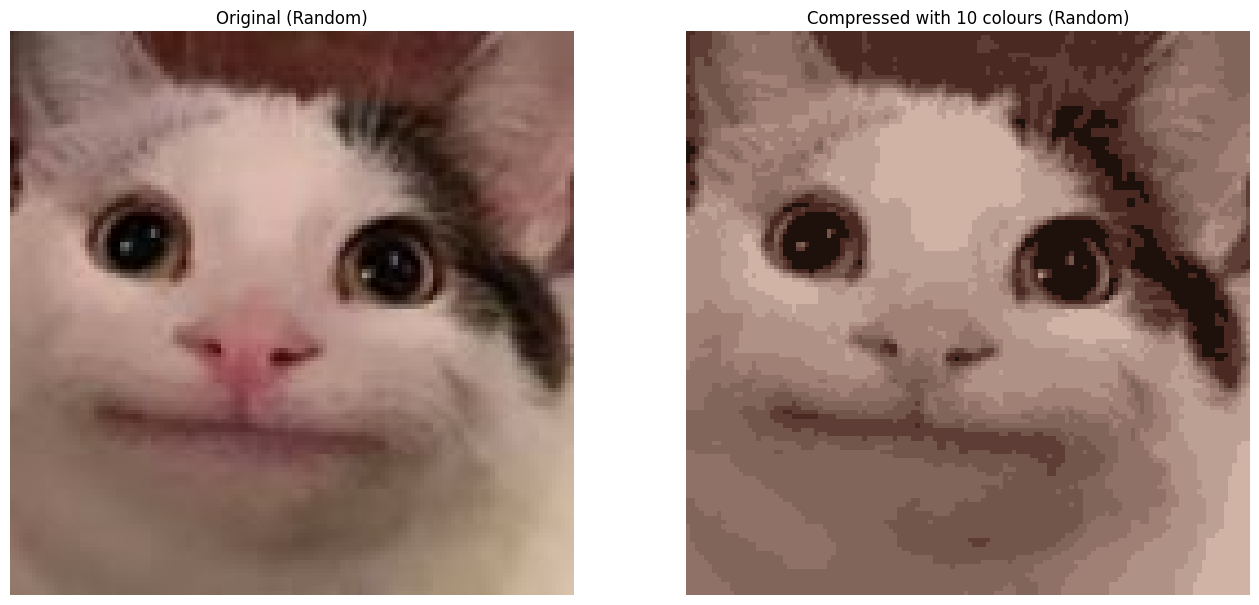

<Figure size 800x600 with 0 Axes>

MSE  (Non-Random): 0.0006746325485308927


K = 20

K-Means iteration 0/999
K-Means iteration 1/999
K-Means iteration 2/999
K-Means iteration 3/999
K-Means iteration 4/999
K-Means iteration 5/999
K-Means iteration 6/999
K-Means iteration 7/999
K-Means iteration 8/999
K-Means iteration 9/999
K-Means iteration 10/999
K-Means iteration 11/999
K-Means iteration 12/999
K-Means iteration 13/999
K-Means iteration 14/999
K-Means iteration 15/999
K-Means iteration 16/999
K-Means iteration 17/999
K-Means iteration 18/999
K-Means iteration 19/999
K-Means iteration 20/999
K-Means iteration 21/999
K-Means iteration 22/999
K-Means iteration 23/999
K-Means iteration 24/999
K-Means iteration 25/999
K-Means iteration 26/999
K-Means iteration 27/999
K-Means iteration 28/999
K-Means iteration 29/999
K-Means iteration 30/999
K-Means iteration 31/999
K-Means iteration 32/999
K-Means iteration 33/999
K-Means iteration 34/999
K-Means iteration 35/999
K-Means iteration 36/999
K-Means iteration 37/999
K-Means i

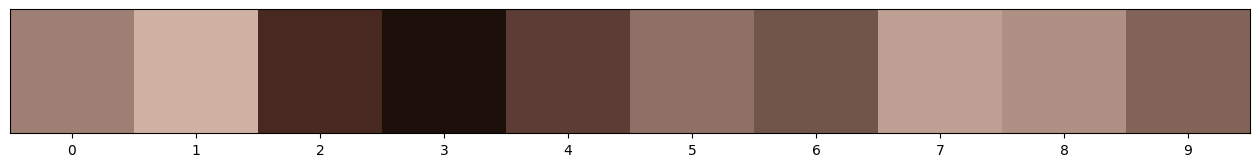

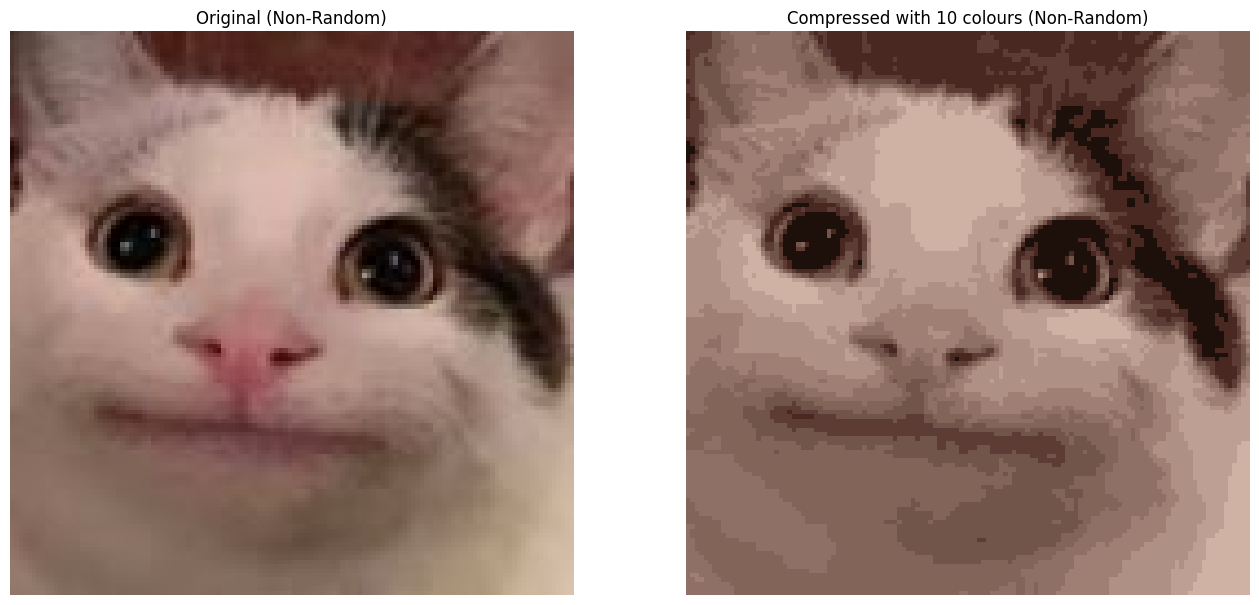

<Figure size 800x600 with 0 Axes>

MSE  (Random) : 0.00033745660526694277
K-Means iteration 0/999
K-Means iteration 1/999
K-Means iteration 2/999
K-Means iteration 3/999
K-Means iteration 4/999
K-Means iteration 5/999
K-Means iteration 6/999
K-Means iteration 7/999
K-Means iteration 8/999
K-Means iteration 9/999
K-Means iteration 10/999
K-Means iteration 11/999
K-Means iteration 12/999
K-Means iteration 13/999
K-Means iteration 14/999
K-Means iteration 15/999
K-Means iteration 16/999
K-Means iteration 17/999
K-Means iteration 18/999
K-Means iteration 19/999
K-Means iteration 20/999
K-Means iteration 21/999
K-Means iteration 22/999
K-Means iteration 23/999
K-Means iteration 24/999
K-Means iteration 25/999
K-Means iteration 26/999
K-Means iteration 27/999
K-Means iteration 28/999
K-Means iteration 29/999
K-Means iteration 30/999
K-Means iteration 31/999
K-Means iteration 32/999
K-Means iteration 33/999
K-Means iteration 34/999
K-Means iteration 35/999
K-Means iteration 36/999
K-Means iteration 37/999
K-Means iteration 38/

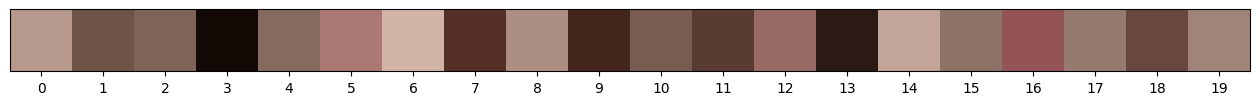

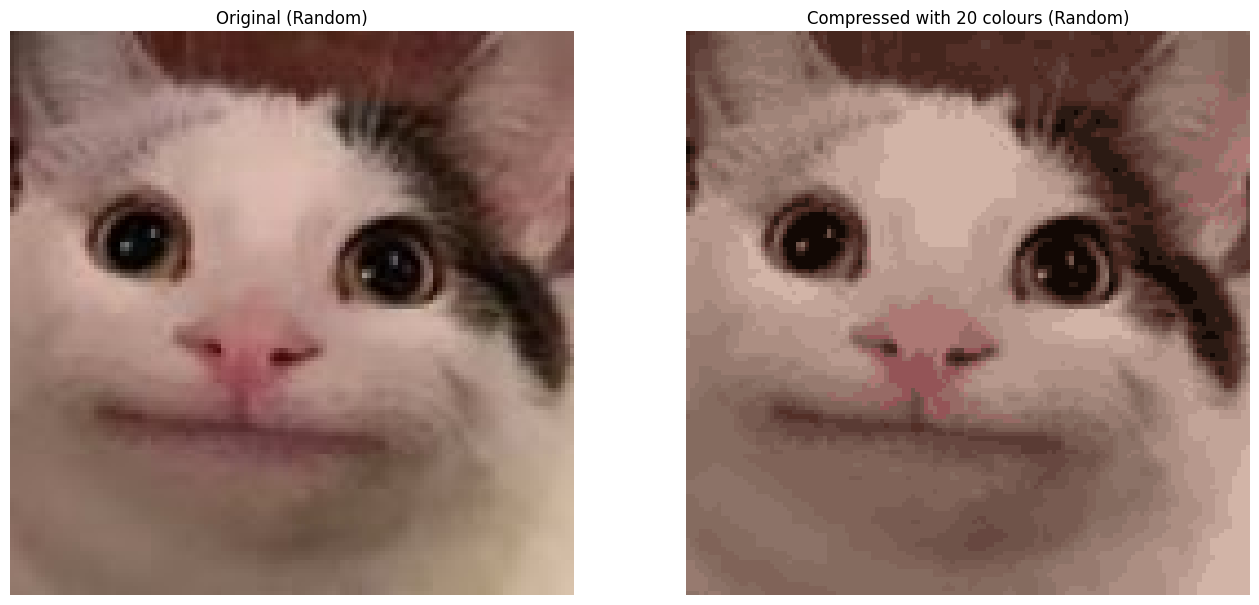

<Figure size 800x600 with 0 Axes>

MSE  (Non-Random): 0.00032016598686915


K = 40

K-Means iteration 0/999
K-Means iteration 1/999
K-Means iteration 2/999
K-Means iteration 3/999
K-Means iteration 4/999
K-Means iteration 5/999
K-Means iteration 6/999
K-Means iteration 7/999
K-Means iteration 8/999
K-Means iteration 9/999
K-Means iteration 10/999
K-Means iteration 11/999
K-Means iteration 12/999
K-Means iteration 13/999
K-Means iteration 14/999
K-Means iteration 15/999
K-Means iteration 16/999
K-Means iteration 17/999
K-Means iteration 18/999
K-Means iteration 19/999
K-Means iteration 20/999
K-Means iteration 21/999
K-Means iteration 22/999
K-Means iteration 23/999
K-Means iteration 24/999
K-Means iteration 25/999
K-Means iteration 26/999
K-Means iteration 27/999
K-Means iteration 28/999
K-Means iteration 29/999
K-Means iteration 30/999
K-Means iteration 31/999
K-Means iteration 32/999
K-Means iteration 33/999
K-Means iteration 34/999
K-Means iteration 35/999
K-Means iteration 36/999
K-Means iteration 37/999
K-Means ite

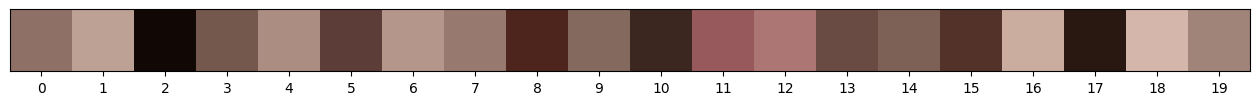

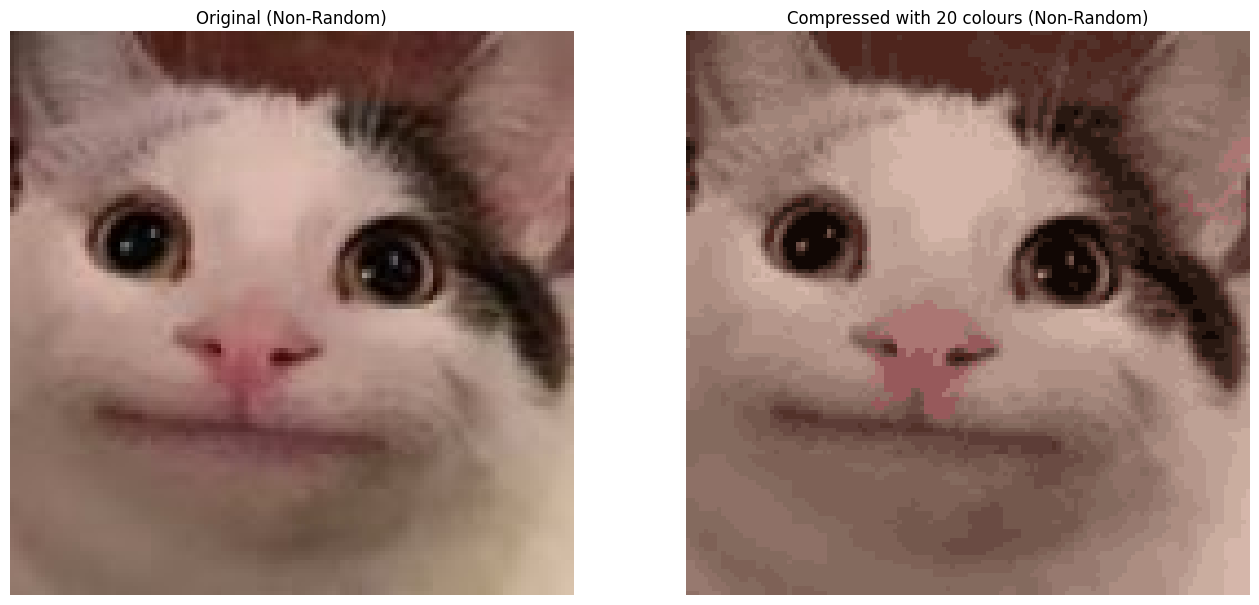

<Figure size 800x600 with 0 Axes>

MSE  (Random) : 0.00021318332781232298
K-Means iteration 0/999
K-Means iteration 1/999
K-Means iteration 2/999
K-Means iteration 3/999
K-Means iteration 4/999
K-Means iteration 5/999
K-Means iteration 6/999
K-Means iteration 7/999
K-Means iteration 8/999
K-Means iteration 9/999
K-Means iteration 10/999
K-Means iteration 11/999
K-Means iteration 12/999
K-Means iteration 13/999
K-Means iteration 14/999
K-Means iteration 15/999
K-Means iteration 16/999
K-Means iteration 17/999
K-Means iteration 18/999
K-Means iteration 19/999
K-Means iteration 20/999
K-Means iteration 21/999
K-Means iteration 22/999
K-Means iteration 23/999
K-Means iteration 24/999
K-Means iteration 25/999
K-Means iteration 26/999
K-Means iteration 27/999
K-Means iteration 28/999


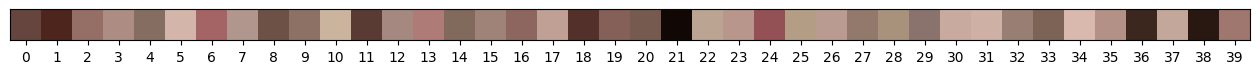

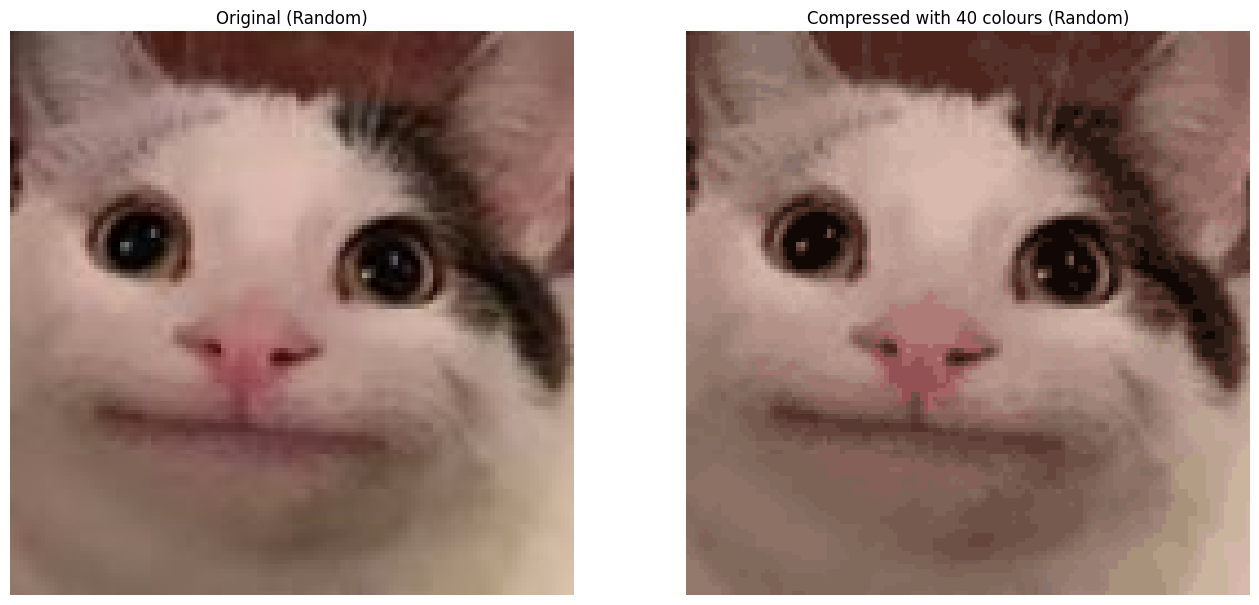

<Figure size 800x600 with 0 Axes>

MSE  (Non-Random): 0.00018859724974486813


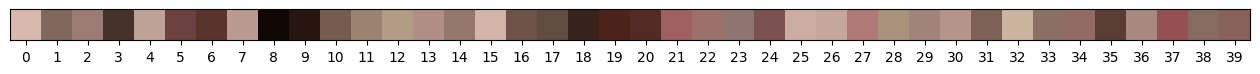

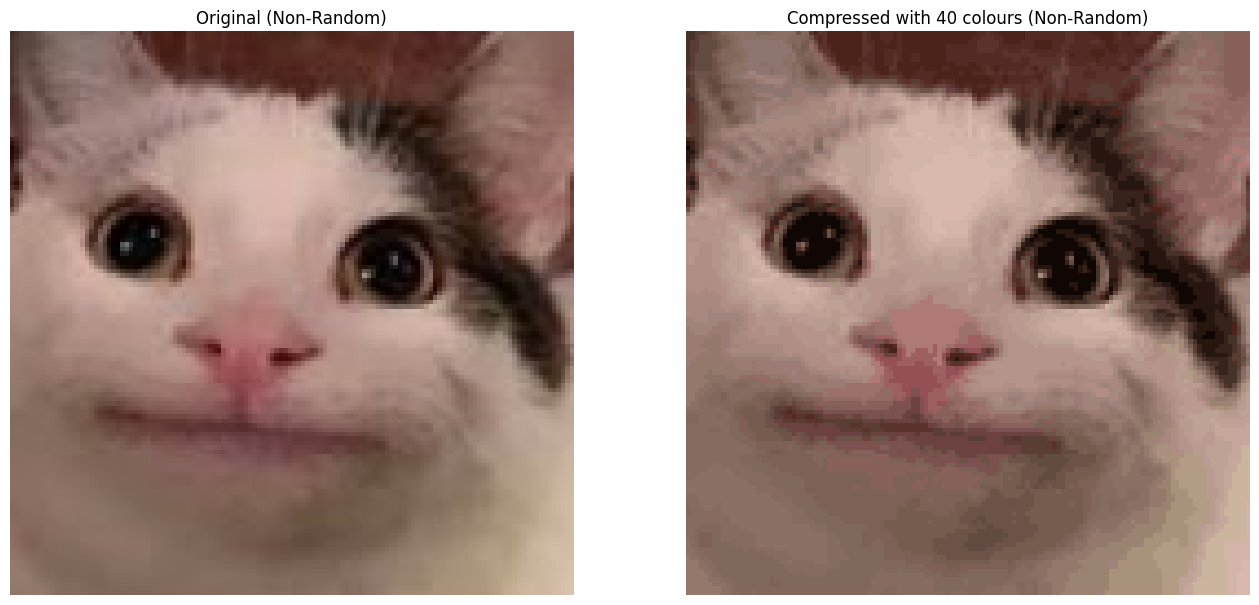

In [16]:
K_list = [2,3,10,20,40]
max_iters = 1000

for K in K_list:
    # Random 
    # Using the function you have implemented above. (random)
    initial_centroids = kMeans_init_centroids(X_img, K)
    print("\n")
    print(f"K = {K}\n")
    # Run K-Means - this can take a couple of minutes depending on K and max_iters
    centroids, idx = run_kMeans(X_img, initial_centroids, max_iters)

    # Visualize the k colors selected
    show_centroid_colors(centroids)

    # Find the closest centroid of each pixel
    idx = find_closest_centroids(X_img, centroids)

    # Replace each pixel with the color of the closest centroid
    X_recovered = centroids[idx, :] 

    # Reshape image into proper dimensions
    X_recovered = np.reshape(X_recovered, original_img.shape)

    # Display original image
    fig, ax = plt.subplots(1,2, figsize=(16,16))
    plt.axis('off')

    ax[0].imshow(original_img)
    ax[0].set_title('Original (Random)')
    ax[0].set_axis_off()


    # Display compressed image
    ax[1].imshow(X_recovered)
    ax[1].set_title('Compressed with %d colours (Random)'%K)
    ax[1].set_axis_off()

    mse = np.mean((original_img - X_recovered) ** 2)
    print(f"MSE  (Random) : {mse}")

    # Non-Random
    # Using the function you have implemented above. (random)
    initial_centroids = kMeans_init_centroids_nonrand(X_img, K)
    

    # Run K-Means - this can take a couple of minutes depending on K and max_iters
    centroids, idx = run_kMeans(X_img, initial_centroids, max_iters)

    # Visualize the k colors selected
    show_centroid_colors(centroids)

    # Find the closest centroid of each pixel
    idx = find_closest_centroids(X_img, centroids)

    # Replace each pixel with the color of the closest centroid
    X_recovered = centroids[idx, :] 

    # Reshape image into proper dimensions
    X_recovered = np.reshape(X_recovered, original_img.shape)

    # Display original image
    fig, ax = plt.subplots(1,2, figsize=(16,16))
    plt.axis('off')

    ax[0].imshow(original_img)
    ax[0].set_title('Original (Non-Random)')
    ax[0].set_axis_off()


    # Display compressed image
    ax[1].imshow(X_recovered)
    ax[1].set_title('Compressed with %d colours (Non-Random)'%K)
    ax[1].set_axis_off()

    mse = np.mean((original_img - X_recovered) ** 2)
    print(f"MSE  (Non-Random): {mse}")